# Libraries

In [1]:
import pyspark
from pyspark.sql import SparkSession

from IPython.display import Image

# Creating Spark Instance

In [2]:
conf = pyspark.SparkConf().setAll([
         ('spark.master',   'local[*]'),
         ('spark.app.name', 'PySpark Demo')])
spark = SparkSession.builder.config(conf=conf).getOrCreate()

22/04/27 13:13:10 WARN Utils: Your hostname, Carloss-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.0.225 instead (on interface en0)
22/04/27 13:13:10 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/04/27 13:13:13 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# Importing Data

In [3]:
df = spark.read.csv("flight-delays/flights.csv",
                    header=True).cache()

22/04/27 13:13:43 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


# Data Schema

In [4]:
df.printSchema()

root
 |-- YEAR: string (nullable = true)
 |-- MONTH: string (nullable = true)
 |-- DAY: string (nullable = true)
 |-- DAY_OF_WEEK: string (nullable = true)
 |-- AIRLINE: string (nullable = true)
 |-- FLIGHT_NUMBER: string (nullable = true)
 |-- TAIL_NUMBER: string (nullable = true)
 |-- ORIGIN_AIRPORT: string (nullable = true)
 |-- DESTINATION_AIRPORT: string (nullable = true)
 |-- SCHEDULED_DEPARTURE: string (nullable = true)
 |-- DEPARTURE_TIME: string (nullable = true)
 |-- DEPARTURE_DELAY: string (nullable = true)
 |-- TAXI_OUT: string (nullable = true)
 |-- WHEELS_OFF: string (nullable = true)
 |-- SCHEDULED_TIME: string (nullable = true)
 |-- ELAPSED_TIME: string (nullable = true)
 |-- AIR_TIME: string (nullable = true)
 |-- DISTANCE: string (nullable = true)
 |-- WHEELS_ON: string (nullable = true)
 |-- TAXI_IN: string (nullable = true)
 |-- SCHEDULED_ARRIVAL: string (nullable = true)
 |-- ARRIVAL_TIME: string (nullable = true)
 |-- ARRIVAL_DELAY: string (nullable = true)
 |-- D

In [5]:
df.show(5)

+----+-----+---+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+-------------+--------+---------+-------------------+----------------+--------------+-------------+-------------------+-------------+
|YEAR|MONTH|DAY|DAY_OF_WEEK|AIRLINE|FLIGHT_NUMBER|TAIL_NUMBER|ORIGIN_AIRPORT|DESTINATION_AIRPORT|SCHEDULED_DEPARTURE|DEPARTURE_TIME|DEPARTURE_DELAY|TAXI_OUT|WHEELS_OFF|SCHEDULED_TIME|ELAPSED_TIME|AIR_TIME|DISTANCE|WHEELS_ON|TAXI_IN|SCHEDULED_ARRIVAL|ARRIVAL_TIME|ARRIVAL_DELAY|DIVERTED|CANCELLED|CANCELLATION_REASON|AIR_SYSTEM_DELAY|SECURITY_DELAY|AIRLINE_DELAY|LATE_AIRCRAFT_DELAY|WEATHER_DELAY|
+----+-----+---+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+-

In [6]:
origin_airport_count = df.groupBy('ORIGIN_AIRPORT').count().orderBy('count', ascending=False)
origin_airport_count.show(5)

22/04/27 13:15:26 WARN MemoryStore: Not enough space to cache rdd_13_1 in memory! (computed 78.9 MiB so far)
22/04/27 13:15:26 WARN BlockManager: Persisting block rdd_13_1 to disk instead.
22/04/27 13:15:27 WARN MemoryStore: Not enough space to cache rdd_13_2 in memory! (computed 78.5 MiB so far)
22/04/27 13:15:27 WARN BlockManager: Persisting block rdd_13_2 to disk instead.
22/04/27 13:15:48 WARN MemoryStore: Not enough space to cache rdd_13_1 in memory! (computed 78.9 MiB so far)


+--------------+------+
|ORIGIN_AIRPORT| count|
+--------------+------+
|           ATL|346836|
|           ORD|285884|
|           DFW|239551|
|           DEN|196055|
|           LAX|194673|
+--------------+------+
only showing top 5 rows



# Rendered EDA Images

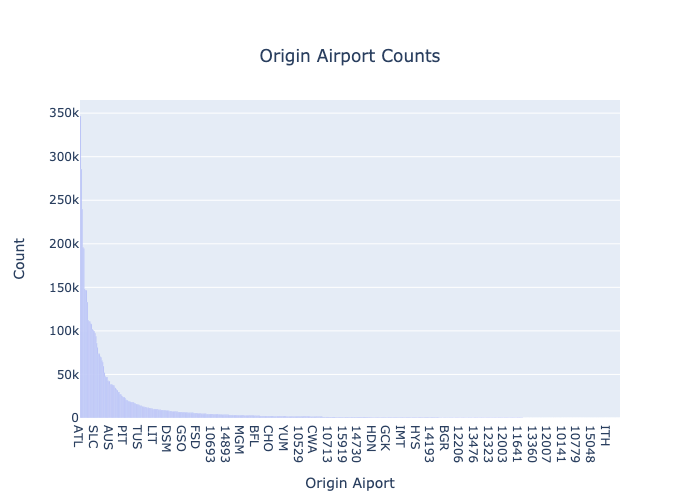

In [7]:
Image(filename="EDA_Images/Origin_Airport_Count.png")